In [303]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [379]:
df = pd.read_csv("data.csv")

In [381]:
df.drop(df.tail(2).index,inplace = True)
df.head(2)

,Category,Import/Export,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20 (P),% Growth
0,Crude Oil Import,Crude Oil Import,189238,189435,202850,213932,220433,226498,226955,0.2
1,Product Import,LPG Import,6567,8313,8959,11097,11380,13235,14809,11.9


## A part - Scatter Plot

In [306]:
# Import
diesel_import= df[(df['Import/Export'] == 'Diesel Import') & (df['Category']=='Product Import')]
petrol_import = df[(df['Import/Export'] == 'Petrol Import') & (df['Category']=='Product Import')]
LPG_import= df[(df['Import/Export'] == 'LPG Import') & (df['Category']=='Product Import')]
kerosene_import = df[(df['Import/Export'] == 'Kerosene Import') & (df['Category']=='Product Import')]
import_df = pd.concat([petrol_import,diesel_import,LPG_import,kerosene_import])

# Export 
diesel_export= df[(df['Import/Export'] == 'Diesel Export') & (df['Category']=='Product Export ')]
petrol_export = df[(df['Import/Export'] == 'Petrol Export') & (df['Category']=='Product Export ')]
LPG_export= df[(df['Import/Export'] == 'LPG Export') & (df['Category']=='Product Export ')]
kerosene_export = df[(df['Import/Export'] == 'Kerosene Export') & (df['Category']=='Product Export ')]
export_df = pd.concat([diesel_export,petrol_export,LPG_export,kerosene_export])

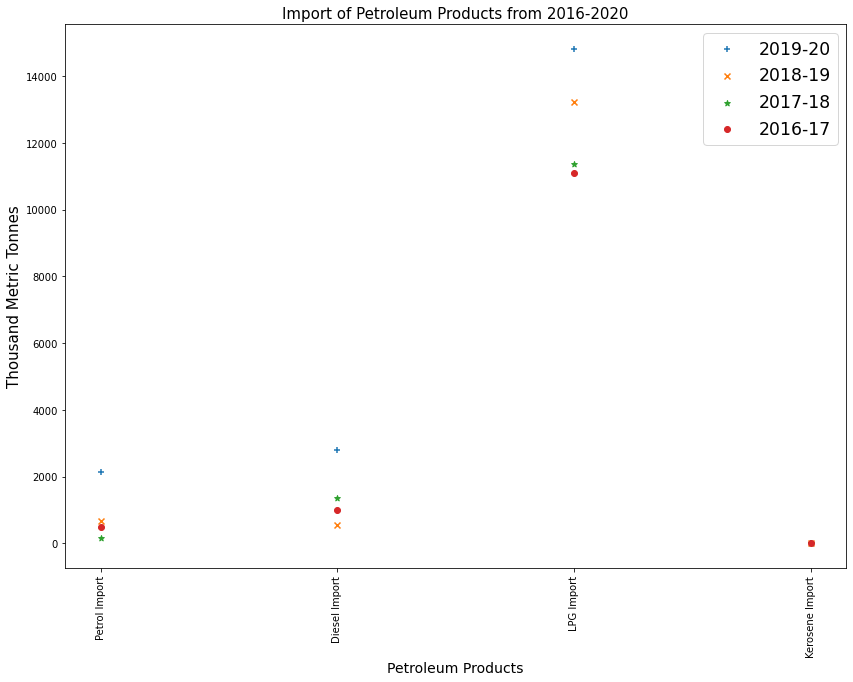

In [307]:
#Import Scatter Plot
fig= plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
plt.scatter(import_df["Import/Export"],import_df["2019-20 (P)"],label="2019-20", marker="+")
plt.scatter(import_df["Import/Export"],import_df["2018-19"],label="2018-19", marker="x")
plt.scatter(import_df["Import/Export"],import_df["2017-18"],label="2017-18", marker="*")
plt.scatter(import_df["Import/Export"],import_df["2016-17"],label="2016-17", marker="o")
plt.ylabel("Thousand Metric Tonnes", fontsize= "15")
plt.xlabel("Petroleum Products", fontsize= "14")
plt.title("Import of Petroleum Products from 2016-2020", fontsize= "15")
plt.xticks(rotation='vertical')
plt.legend(fontsize ='xx-large');

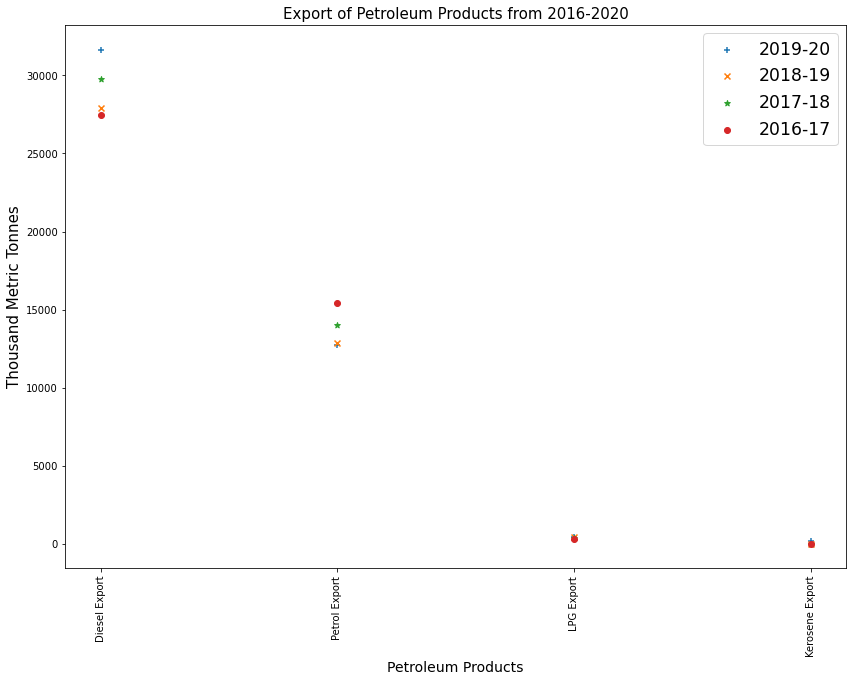

In [308]:
#Export Scatter Plot
fig= plt.subplots(nrows=1, ncols=1, figsize=(14, 10))
plt.scatter(export_df["Import/Export"],export_df["2019-20 (P)"],label="2019-20", marker="+")
plt.scatter(export_df["Import/Export"],export_df["2018-19"],label="2018-19", marker="x")
plt.scatter(export_df["Import/Export"],export_df["2017-18"],label="2017-18", marker="*")
plt.scatter(export_df["Import/Export"],export_df["2016-17"],label="2016-17", marker="o")
plt.ylabel("Thousand Metric Tonnes", fontsize= "15")
plt.xlabel("Petroleum Products", fontsize= "14")
plt.title("Export of Petroleum Products from 2016-2020", fontsize= "15")
plt.xticks(rotation='vertical')
plt.legend(fontsize ='xx-large');

## B part - Bar Plot

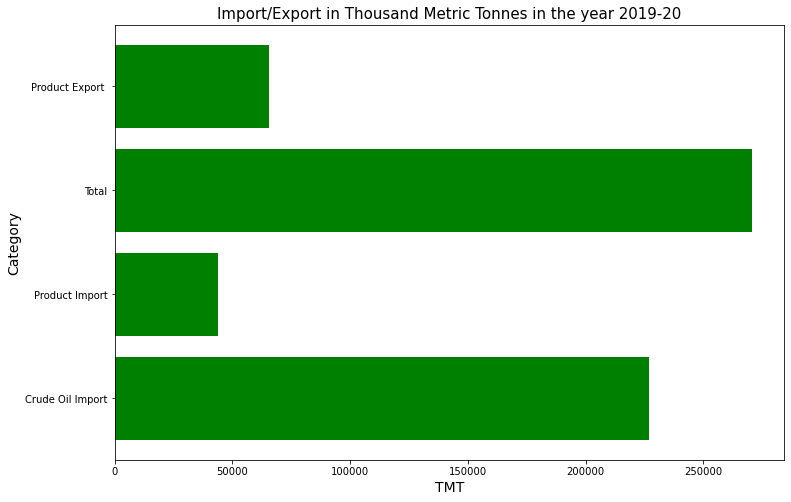

In [309]:
category = df['Category']
year = df['2019-20 (P)']
fig, ax = plt.subplots(figsize =(12, 8))
plt.barh(category,year, color='green')
plt.ylabel("Category", fontsize= "14")
plt.xlabel("TMT", fontsize= "14")
plt.title("Import/Export in Thousand Metric Tonnes in the year 2019-20", fontsize= "15")
plt.show();

## C part - Boxplot

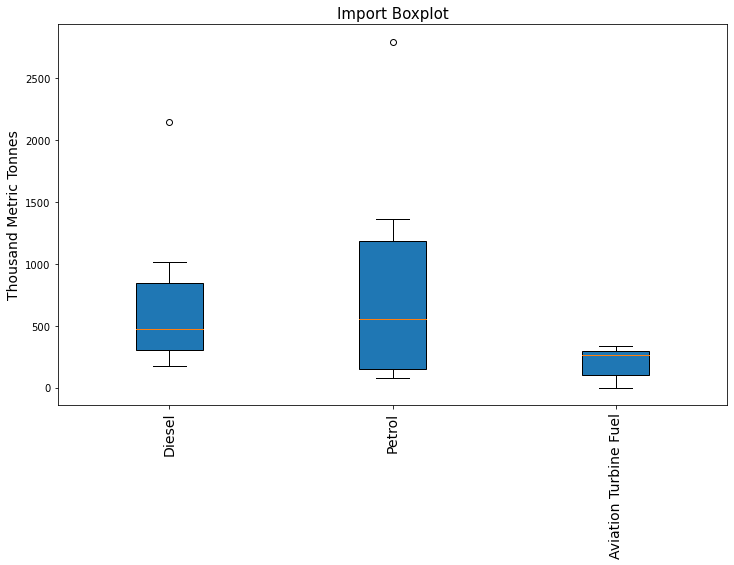

In [378]:
df_transposed = df.T
df_transposed.rename(columns = {0:'Crude Oil Import',2:'Petrol Import',4:'Aviation Turbine Fuel Import',6:'Diesel Import'},inplace=True)
df_transposed.drop(index=['Import/Export','Category','% Growth'],inplace=True)
diesel_import_lst = df_transposed['Diesel Import'].values
petrol_import_lst = df_transposed['Petrol Import'].values
aviation_import_lst = df_transposed['Aviation Turbine Fuel Import'].values
data_import = [petrol_import_lst,diesel_import_lst,aviation_import_lst]
df_transposed.rename(columns = {15:'Petrol Export',17:'Aviation Turbine Fuel Export',19:'Diesel Export'},inplace=True)
diesel_export_lst = df_transposed['Diesel Export'].values
petrol_export_lst = df_transposed['Petrol Export'].values
aviation_export_lst = df_transposed['Aviation Turbine Fuel Export'].values
data_export = [petrol_export_lst,diesel_export_lst,aviation_export_lst]


plt.figure(figsize=(12,7))
plt.boxplot(data,patch_artist=True)
plt.xticks([1, 2, 3], ['Diesel', 'Petrol', 'Aviation Turbine Fuel'],rotation='vertical',fontsize=14)
plt.title('Import Boxplot',fontsize=15)
plt.ylabel('Thousand Metric Tonnes',fontsize=14)
plt.show();

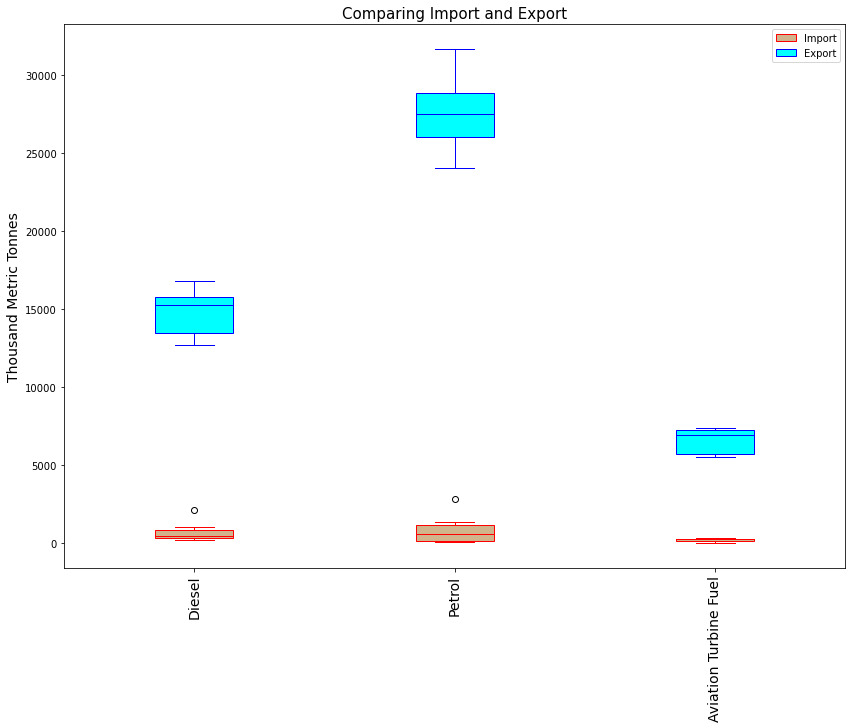

In [380]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)          
    return bp

fig, ax = plt.subplots(figsize= (14,10))
bp1 = box_plot(data_import, 'red', 'tan')
bp2 = box_plot(data_export, 'blue', 'cyan')
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Import', 'Export'])
plt.title('Comparing Import and Export',fontsize = 15)
plt.ylabel('Thousand Metric Tonnes',fontsize=14)
plt.xticks([1, 2, 3], ['Diesel', 'Petrol', 'Aviation Turbine Fuel'],rotation='vertical',fontsize=14)
plt.show();